In [3]:
import idx2numpy as id
import numpy as np
import matplotlib.pyplot as plt
imagefile='train-images.idx3-ubyte'
trainlabel='train-labels.idx1-ubyte'
X=id.convert_from_file(imagefile)
X=X.T
X.resize(784,60000)
X=X/255
testimage='t10k-images.idx3-ubyte'
X_test=id.convert_from_file(testimage)
X_test=X_test.T
X_test.resize(784,10000)
testlabel='t10k-labels.idx1-ubyte'
Y_test_label=id.convert_from_file(testlabel)
X_test=X_test/255
Y_train_label=id.convert_from_file(trainlabel)
Yone_hot=np.zeros((10,60000))
for i in range(60000):
        Yone_hot[Y_train_label[i]][i]=1
print(Yone_hot)
print(X.shape)
print(X_test.shape)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(784, 60000)
(784, 10000)


In [16]:
costs=[]
accuracies=[]

In [17]:
def getAccuracy(prediction_0,Y_0):
    count=0
    for i in range(10000):
        if(prediction_0[i]==Y_0[i]):
            count=count+1
    accuracy=count/10000
    percentage=accuracy*100
    return percentage

In [18]:
W=np.random.randn(784,10)
W=W*0.01
b=np.random.randn(10,1)
b=b*0.01
print(W)
print(b)

[[-0.01496626  0.01080765 -0.00856229 ... -0.00570655 -0.00873114
   0.00608141]
 [-0.00059663 -0.00764699  0.0002639  ...  0.00383648  0.01702558
   0.00504377]
 [-0.00852871 -0.0077768   0.00483473 ...  0.00285681 -0.0048716
  -0.00050757]
 ...
 [ 0.00768066 -0.00174179  0.00024189 ...  0.0012808  -0.00804816
  -0.0082016 ]
 [-0.01311556  0.00308979  0.00082448 ...  0.00218687 -0.00821292
   0.00869441]
 [ 0.02149425  0.0012253   0.0065781  ... -0.00036049  0.00809968
   0.00849712]]
[[ 1.04293428e-02]
 [ 2.33545690e-03]
 [ 5.77929360e-05]
 [ 9.97604075e-03]
 [ 1.01764996e-02]
 [ 1.99758773e-02]
 [ 2.22878427e-03]
 [-4.31965213e-03]
 [-1.28000291e-02]
 [-1.59838611e-02]]


In [19]:
for i in range(250):
    #forward propagation
    Z=np.dot(W.T,X)+b
    #softmax

    Y_hat=np.exp(Z)
    Y_hat=Y_hat/np.sum(Y_hat,axis=0)
    #costfunction
    loss=-(Yone_hot*np.log(Y_hat)+(1-Yone_hot)*np.log(1-Y_hat))
    cost=np.sum(loss)/60000
    costs.append(cost)
    print(cost)
    #back prop
    dz=Y_hat-Yone_hot
    db=np.sum(dz, axis=1, keepdims=True)/60000
    dw=np.dot(X,dz.T)/60000
    alpha=0.85
    W=W-alpha*dw
    b=b-alpha*db
    Z_1=np.dot(W.T,X_test)
    Z_final=np.exp(Z_1)
    Z_final=Z_final/np.sum(Z_final,axis=0)
    predictions=np.argmax(Z_final,axis=0)
    a=getAccuracy(predictions,Y_test_label)
    accuracies.append(a)
print(predictions) 

3.252985552892752
2.409911464603452
2.0914745316285255
2.189977553783989
1.9144725767054342
2.005426188995582
1.8069969956128016
1.4162283671479337
1.439141287751677
1.3043486594621494
1.3081912333515313
1.282331824158206
1.2865661303544558
1.1488993835830195
1.1307085192621684
1.0705644032765518
1.0395430557757128
0.9993733859033564
0.957495544765972
0.9295739309820737
0.8913598028541224
0.8702474969621699
0.8418610616236646
0.8255633327676692
0.8064931935027837
0.7941896066508844
0.7816261347410518
0.7724457104578558
0.763763126789994
0.7567278936765339
0.7501803061538148
0.7444692607327904
0.7390823909328992
0.734162456168776
0.729451603555463
0.7250364431892244
0.7207754793902534
0.7167261285911034
0.7128075960529242
0.7090547899249057
0.7054206223039228
0.7019237328666378
0.6985360928028215
0.6952660566315765
0.6920963959795298
0.6890296442335715
0.6860547089832293
0.6831711179488623
0.6803713065309236
0.6776533967591306
0.6750119045692236
0.6724443967086682
0.6699466649026896
0.6

In [20]:
print(W)
print(b)
print(accuracies[199])

[[-0.01496626  0.01080765 -0.00856229 ... -0.00570655 -0.00873114
   0.00608141]
 [-0.00059663 -0.00764699  0.0002639  ...  0.00383648  0.01702558
   0.00504377]
 [-0.00852871 -0.0077768   0.00483473 ...  0.00285681 -0.0048716
  -0.00050757]
 ...
 [ 0.00768066 -0.00174179  0.00024189 ...  0.0012808  -0.00804816
  -0.0082016 ]
 [-0.01311556  0.00308979  0.00082448 ...  0.00218687 -0.00821292
   0.00869441]
 [ 0.02149425  0.0012253   0.0065781  ... -0.00036049  0.00809968
   0.00849712]]
[[-0.21608869]
 [ 0.29136915]
 [ 0.01631258]
 [-0.16427724]
 [ 0.07530248]
 [ 0.75632476]
 [-0.04468572]
 [ 0.37357688]
 [-0.91332841]
 [-0.15242954]]
90.56


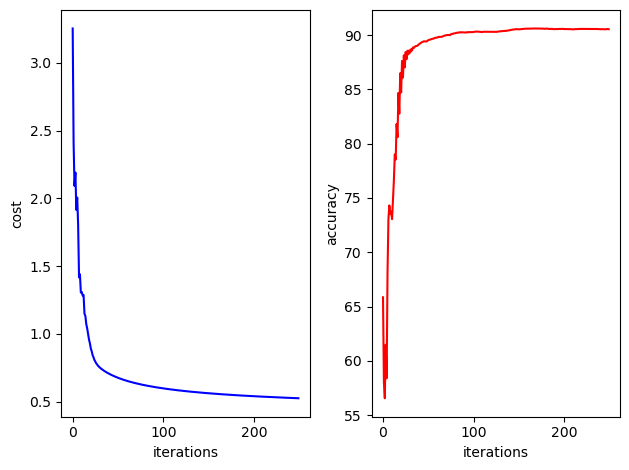

In [21]:
plt.subplot(1,2,1)
plt.plot(costs,'b')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.subplot(1,2,2)
plt.plot(accuracies,'r')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.tight_layout()

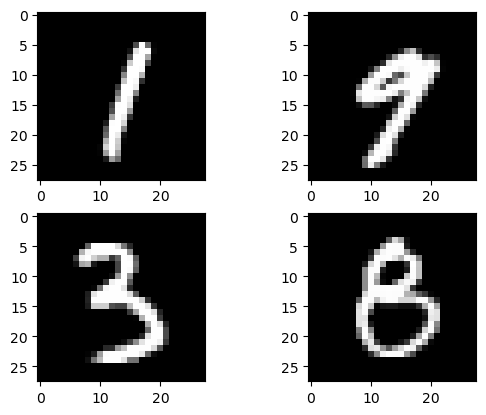

In [22]:
X_1=id.convert_from_file(testimage)
plt.subplot(2,2,1)
plt.imshow(X_1[5],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(X_1[20],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(X_1[32],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(X_1[800],cmap='gray')